# HOMEWORK 1: Valutazione
Si è usato trec_eval di Terrier per effettuare la valutazione, si sono quindi ottenuti i valori di:
* MAP: dal campo map all
* Precision@10: dal campo P_10 all
* Rprec: da Rprec all

Mentre risulta necessario calcolare ANOVA-oneway

# Identificazione delle run:
Le run sono identificate come segue:
* RUN#0: modello BM25 con indice con PorterStemmer e Stopwords;
* RUN#1: modello TFIDF con indice con PorterStemmer e Stopwords;
* RUN#2: modello BM25 con indice con PorterStemmer;
* RUN#3: modello TFIDF con indice senza PorterStemmer e Stopwords.

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
#creo la funzione che mi popolerà gli array
def insertAll(file,array,parameter):
    #apro il file che mi viene passato e ne leggo le righe
    file=open(file)
    lines = file.readlines()
    for index in range(len(lines)):
        #per ogni riga: la divido nelle parti che la compongono
        line=lines[index]
        line=line.split()
        #controllo la misura richiesta e che sia relativa ad un topic
        if (line[0]==parameter) and (line[1]!="all"):
            array.append(line[2])
        #controllo e popolo i vettori generali per i valori totali ("all") della run
        elif (line[0]==parameter) and (parameter=="map") and(line[1]=="all"):
            maps.append(line[2])
        elif (line[0]==parameter) and (parameter=="P_10") and (line[1]=="all"):
            p10s.append(line[2])
        elif (line[0]==parameter) and (parameter=="Rprec") and (line[1]=="all"):
            rprecs.append(line[2])
    #chiudo il file
    file.close()
#chiudo la funzione

path="C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\"
maps=[]
p10s=[]
rprecs=[]
#localizzo il primo file di valutazione
valutazioneBM25_0  = path+"valutazioneBM25_0.txt"
#creo gli array che conteranno i valori che cerco
ap_bm250=[]
p10_bm250=[]
rprec_bm250=[]
#localizzo il secondo file di valutazione
valutazioneTFIDF_1  = path+"valutazioneTFIDF_1.txt"
#creo gli array che conteranno i valori che cerco
ap_tfidf1=[]
p10_tfidf1=[]
rprec_tfidf1=[]
#localizzo il terzo file di valutazione
valutazioneBM25_2  = path+"valutazioneBM25_2.txt" 
#creo gli array che conteranno i valori che cerco
ap_bm252=[]
p10_bm252=[]
rprec_bm252=[]
#localizzo il quarto file di valutazione
valutazioneTFIDF_3  = path+"valutazioneTFIDF_3.txt" 
#creo gli array che conteranno i valori che cerco
ap_tfidf3=[]
p10_tfidf3=[]
rprec_tfidf3=[]
#BM25_0: popolo i vettori
print("Sto creando i vettori della RUN#0: BM25...")
insertAll(valutazioneBM25_0,ap_bm250,"map")
insertAll(valutazioneBM25_0,p10_bm250,"P_10")
insertAll(valutazioneBM25_0,rprec_bm250,"Rprec")
#TFIDF_1: popolo i vettori
print("Sto creando i vettori della RUN#1: TFIDF...")
insertAll(valutazioneTFIDF_1,ap_tfidf1,"map")
insertAll(valutazioneTFIDF_1,p10_tfidf1,"P_10")
insertAll(valutazioneTFIDF_1,rprec_tfidf1,"Rprec")
#BM25_2: popolo i vettori
print("Sto creando i vettori della RUN#2: BM25... ")
insertAll(valutazioneBM25_2,ap_bm252,"map")
insertAll(valutazioneBM25_2,p10_bm252,"P_10")
insertAll(valutazioneBM25_2,rprec_bm252,"Rprec")
#TFIDF_3: popolo i vettori
print("Sto creando i vettori della RUN#3: TFIDF... ")
insertAll(valutazioneTFIDF_3,ap_tfidf3,"map")
insertAll(valutazioneTFIDF_3,p10_tfidf3,"P_10")
insertAll(valutazioneTFIDF_3,rprec_tfidf3,"Rprec")
print("Vettori creati!")
#Faccio il testo ANOVA 1-way
Fvalue, pvalue = stats.f_oneway(ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3)
Fvaluep10, pvaluep10 = stats.f_oneway(p10_bm250, p10_tfidf1, p10_bm252, p10_tfidf3)
Fvaluerp, pvaluerp = stats.f_oneway(rprec_bm250, rprec_tfidf1, rprec_bm252, rprec_tfidf3)
print("ANOVA one-way per AP:\n","F-value:",Fvalue,"P-value:",pvalue)
print("ANOVA one-way per Precision@10:\n","F-value:",Fvaluep10,"P-value:",pvaluep10)
print("ANOVA one-way per Rprec:\n","F-value:",Fvaluerp,"P-value:",pvaluerp)

Sto creando i vettori della RUN#0: BM25...
Sto creando i vettori della RUN#1: TFIDF...
Sto creando i vettori della RUN#2: BM25... 
Sto creando i vettori della RUN#3: TFIDF... 
Vettori creati!
ANOVA one-way per AP:
 F-value: 0.269822428311433 P-value: 0.8471081879709074
ANOVA one-way per Precision@10:
 F-value: 0.35778395335621926 P-value: 0.7835600894153874
ANOVA one-way per Rprec:
 F-value: 0.35084941805375086 P-value: 0.7885747493027742


In [2]:
#controllo la validità dell'ipotesi, confronto alpha con pvalue e eventualmente lo sostituisco
alpha=0.05
if pvalue<alpha:
    print("Rifiuto la null-hypothesis")
    alpha=pvalue
else:
    print("Accetto la null-hypothesis")


Accetto la null-hypothesis


In [68]:
#Funzione Tukey
from statsmodels.stats.multicomp import MultiComparison    
def Tukey(vector0,vector1,vector2,vector3,runID,alpha,xlabel):
    #creo il vettore con tutti i dati, lo passo al multicomparison per fare il tukeyHSD
    vectorAll=np.concatenate([vector0, vector1, vector2, vector3])
    mc = MultiComparison(vectorAll.astype('float'), runID)
    result = mc.tukeyhsd(alpha)
    print(xlabel)
    print(result.summary())
    vector0 = np.array(vector0).astype('float')
    av_0=np.sum(vector0/50)
    vector1 = np.array(vector1).astype('float')
    av_1=np.sum(vector1/50)
    vector2 = np.array(vector2).astype('float')
    av_2=np.sum(vector2/50)
    vector3 = np.array(vector3).astype('float')
    av_3=np.sum(vector3/50)
    run0=("RUN#0",av_0)
    run1=("RUN#1",av_1)
    run2=("RUN#2",av_2)
    run3=("RUN#3",av_3)      
    best = np.amax([run0[1],run1[1],run2[1],run3[1]])
    
    #plotto i risultati
    result.plot_simultaneous(comparison_name="RUN#0",xlabel=xlabel,ylabel="RUN")

AP
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
RUN#0  RUN#1  -0.0005  -0.0865 0.0855 False 
RUN#0  RUN#2  -0.0018  -0.0877 0.0842 False 
RUN#0  RUN#3  -0.0251  -0.1111 0.0609 False 
RUN#1  RUN#2  -0.0012  -0.0872 0.0848 False 
RUN#1  RUN#3  -0.0246  -0.1106 0.0614 False 
RUN#2  RUN#3  -0.0233  -0.1093 0.0626 False 
--------------------------------------------
0.212576
P_10
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
RUN#0  RUN#1   -0.004  -0.1572 0.1492 False 
RUN#0  RUN#2   -0.01   -0.1632 0.1432 False 
RUN#0  RUN#3   -0.054  -0.2072 0.0992 False 
RUN#1  RUN#2   -0.006  -0.1592 0.1472 False 
RUN#1  RUN#3   -0.05   -0.2032 0.1032 False 
RUN#2  RUN#3   -0.044  -0.1972 0.1092 False 
--------------------------------------------
0.4840000000000001
RPREC
Multiple Comparison of Means - Tukey HSD,FWER=

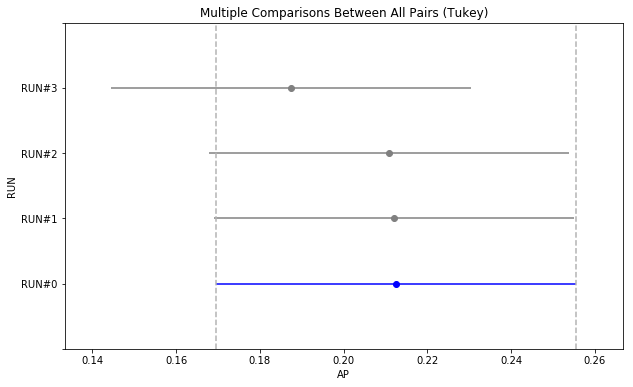

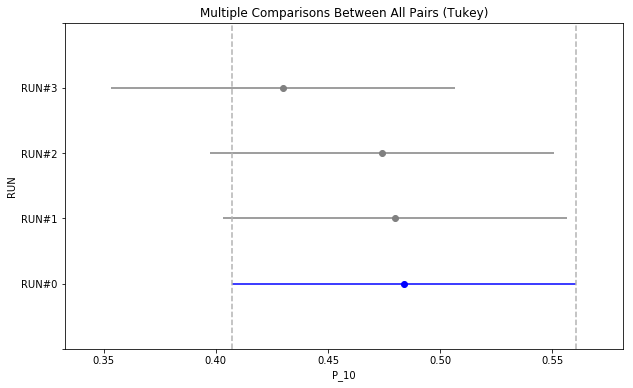

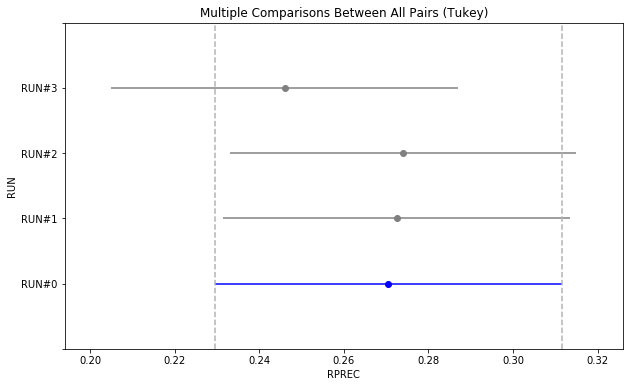

In [69]:
runID=[]
for i in range(4):
#popolo il vettore
    for index in range(50):
        runID.append("RUN#"+str(i))

#conduco il TukeyHSD test
Tukey(ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3,runID,alpha,"AP")
Tukey(p10_bm250, p10_tfidf1, p10_bm252, p10_tfidf3,runID,alpha,"P_10")
Tukey(rprec_bm250, rprec_tfidf1, rprec_bm252, rprec_tfidf3,runID,alpha,"RPREC")

# Risultati
Ora inserisco le tabelle e i grafici con i risultati di MAP,AP per i vari topic e per le varie RUN

╒══════════╤════════╤════════════════╤═════════╕
│ RUN ID   │    MAP │   Precision@10 │   Rprec │
╞══════════╪════════╪════════════════╪═════════╡
│ RUN#0    │ 0.2126 │          0.484 │  0.2705 │
├──────────┼────────┼────────────────┼─────────┤
│ RUN#1    │ 0.212  │          0.48  │  0.2725 │
├──────────┼────────┼────────────────┼─────────┤
│ RUN#2    │ 0.2108 │          0.474 │  0.274  │
├──────────┼────────┼────────────────┼─────────┤
│ RUN#3    │ 0.1875 │          0.43  │  0.246  │
╘══════════╧════════╧════════════════╧═════════╛


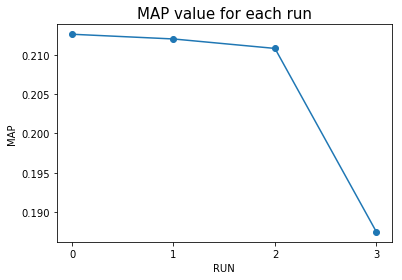

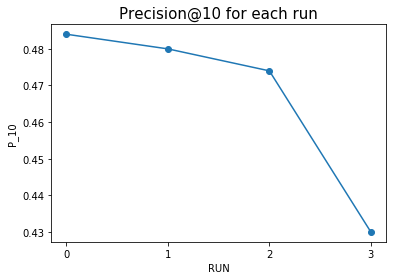

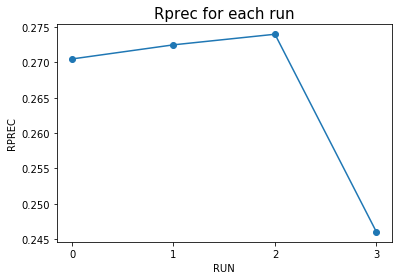

In [55]:
#funzione di plot
def plot(array,ylabel,xlabel,title,yvalues,x):
    #plt.figure(figsize=(20,10))
    measures=list(map(float,array))
    plt.plot(x,measures,marker="o")
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel,fontsize=10)
    plt.xticks(yvalues)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    plt.ylabel(ylabel,fontsize=10)
    plt.show()

from tabulate import tabulate
#creo una tabella con i valori "all" relativa alle varie run
table = [["RUN#0",maps[0],p10s[0],rprecs[0]],["RUN#1",maps[1],p10s[1],rprecs[1]],["RUN#2",maps[2],p10s[2],rprecs[2]],["RUN#3",maps[3],p10s[3],rprecs[3]]]
print(tabulate(table, headers=["RUN ID","MAP","Precision@10","Rprec"],tablefmt="fancy_grid"))


#plotto le MAP,le P_10 e le RPREC delle varie RUN
plot(maps,"MAP","RUN","MAP value for each run",range(4),range(4))
plot(p10s,"P_10","RUN","Precision@10 for each run",range(4),range(4))
plot(rprecs,"RPREC","RUN","Rprec for each run",range(4),range(4))
    
#plotto le singole AP per i vari topic per la singola run    
#plot(ap_bm250,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#0",range(351,400,5),range(351,401))
#plot(ap_tfidf1,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#1",range(351,400,5),range(351,401))
#plot(ap_bm252,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#2",range(351,400,5),range(351,401))
#plot(ap_tfidf3,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#3",range(351,400,5),range(351,401))

Come si può vedere dalle tabelle e dai grafici sopra riportati i risultati migliori si hanno nella run \#0, ossia quella con il modello BM25 e l'utilizzo del PorterStemmer e della stoplis. Si può inoltre aggiungere che nel caso di utilizzo del modello TF_IDF la valutazione è molto influenzata dalla presenza (o meno) dello stemmer, sempre PorterStemmer nel caso in esame, e della stoplist, tanto che la run \#3 è risultata la peggiore in ogni parametro di confronto con le altre.

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148]
[  3.2   5.2   7.2   9.2  11.2  13.2  15.2  17.2  19.2  21.2  23.2  25.2
  27.2  29.2  31.2  33.2  35.2  37.2  39.2  41.2  43.2  45.2  47.2  49.2
  51.2  53.2  55.2  57.2  59.2  61.2  63.2  65.2  67.2  69.2  71.2  73.2
  75.2  77.2  79.2  81.2  83.2  85.2  87.2  89.2  91.2  93.2  95.2  97.2
  99.2 101.2 103.2 105.2 107.2 109.2 111.2 113.2 115.2 117.2 119.2 121.2
 123.2 125.2 127.2 129.2 131.2 133.2 135.2 137.2 139.2 141.2 143.2 145.2
 147.2 149.2 151.2]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

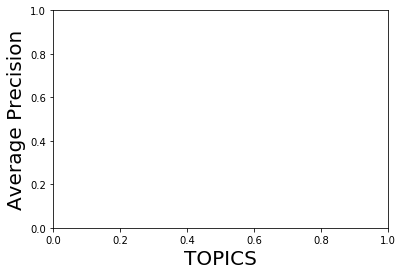

In [99]:
#import numpy as np
#from basic_units import cm, inch
#import matplotlib.pyplot as plt


N = 50
ap_bm250 = list(map(float,ap_bm250)) 
#(150, 160, 146, 172, 155,166)

fig, ax = plt.subplots()
plt.xlabel("TOPICS",fontsize=20)
plt.ylabel("Average Precision",fontsize=20)

ind = np.arange() # the x locations for the groups
width = 0.8   # the width of the bars
print(ind)
print(ind+4*width)
p1 = ax.bar(ind, ap_bm250, width, color='r', bottom=0,align='edge')


ap_tfidf1 = list(map(float,ap_tfidf1))
#(145, 149, 172, 165, 200,201)
p2 = ax.bar(ind + width, ap_tfidf1, width,
            color='b', bottom=0,align='edge')

ap_bm252 = list(map(float,ap_bm252)) 
p3 = ax.bar(ind + 2*width, ap_bm252, width,
            color='y', bottom=0,align='edge')


ap_tfidf3 = list(map(float,ap_tfidf3))
#(145, 149, 172, 165, 200,201)
p4 = ax.bar(ind + 3*width, ap_tfidf3, width,
            color='g', bottom=0,align='edge')

ax.set_title('AP')
ax.set_xticks(ind+1.5*width)
#ax.set_xticklabels(range(351,401))
#ax.set_xscale('log')
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('RUN#0', 'RUN#1','RUN#2','RUN#3'))
#ax.autoscale_view()
ax.set_xticklabels(range(351,401),fontsize=12)
fig.set_size_inches(20, 10.5)
plt.show()